<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/gasvaluechain/energystatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Enenrgy Statistics
This chapter will present statistics of energy consumption and sources for energy.

# Litterature

* https://www.bp.com/en/global/corporate/energy-economics/energy-outlook/introduction/executive-summary.html

https://www.equinor.com/no/sustainability/energy-perspectives.html

https://www.shell.com/energy-and-innovation/natural-gas/liquefied-natural-gas-lng/lng-outlook-2021.html#iframe=L3dlYmFwcHMvTE5HX091dGxvb2svMjAyMS8

https://www.enerdata.net/publications/reports-presentations/world-energy-trends.html

Euro stat:
https://ec.europa.eu/eurostat/web/main/home

# Data

https://data.worldbank.org/

EU - energy stat: https://ec.europa.eu/eurostat/cache/infographs/energy/index.html?lang=en




# World energy production

https://www.bp.com/en/global/corporate/energy-economics/energy-outlook/introduction/overview.html


Enenrgy productions:
https://www.bp.com/en/global/corporate/energy-economics/energy-outlook/introduction/overview.html


Energy production figure 7% distribution of energy procution technologies):

https://cfvod.kaltura.com/p/895641/sp/89564100/thumbnail/entry_id/1_tqyhvh3a/version/100021/width/570/height/320



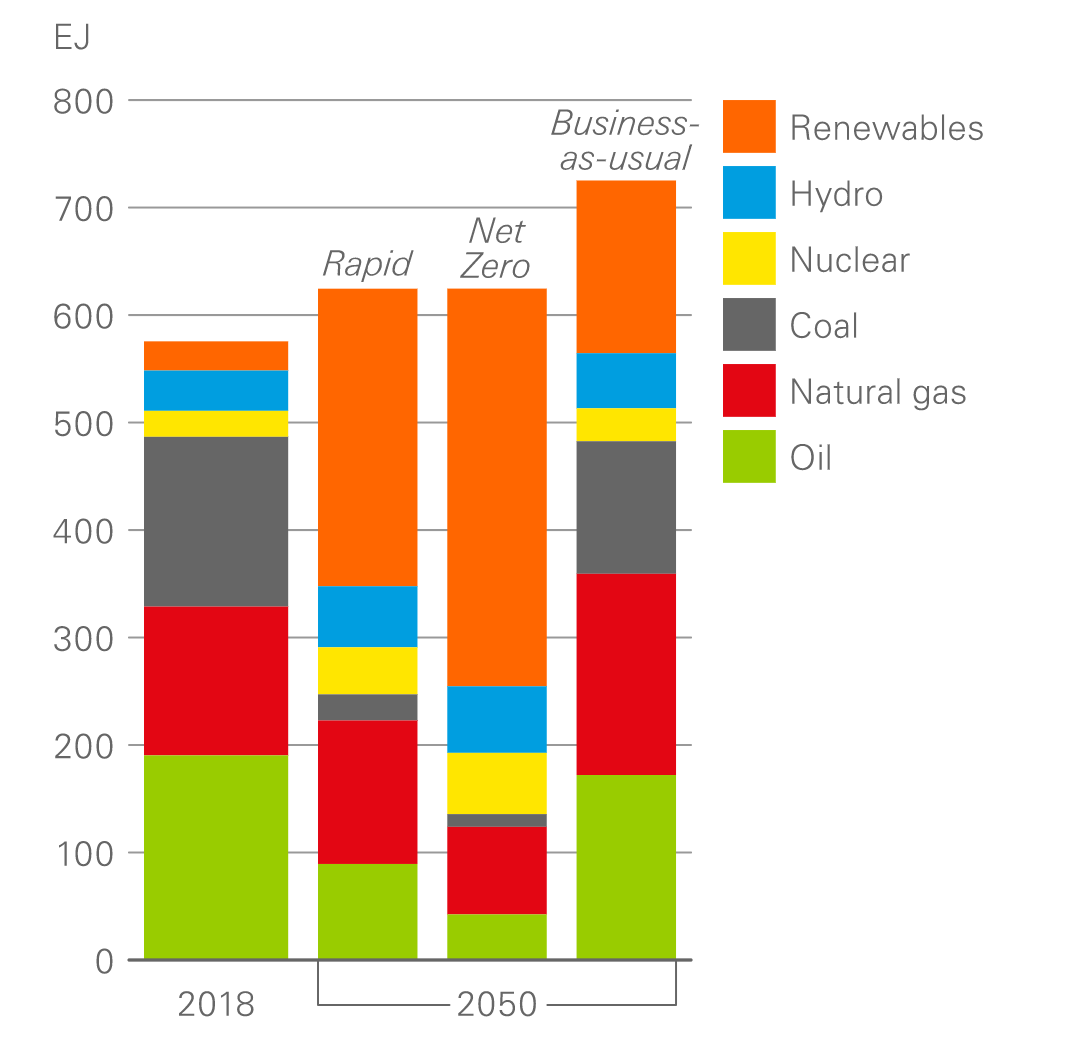

# From where does EU import the energy

https://ec.europa.eu/eurostat/cache/infographs/energy/bloc-2c.html




# Natural Gas

https://www.iea.org/fuels-and-technologies/gas


https://www.shell.com/energy-and-innovation/natural-gas/providing-more-and-cleaner-energy.html




# CO2 emission

https://www.eia.gov/energyexplained/energy-and-the-environment/where-greenhouse-gases-come-from.php

How much carbon dioxide is produced when different fuels are burned?

https://www.eia.gov/tools/faqs/faq.php?id=73&t=11



#World energy outlook

https://www.iea.org/reports/world-energy-outlook-2020